In [7]:
import os
import re
import numpy as np
import scipy
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import time

In [8]:
#Import file with features extracted in the CNN process (model VGG16 pre-trained and fine tuned over 50 classes)
path = '/Users/chloe/Desktop/DataScientest/project/Picasso/pred_cnn.csv'
df=pd.read_csv(path)

In [9]:
#Dataframe preparation for machine learning
df['label'] = df['label'].str.replace('.jpg', '')
df['label'] = df['label'].str.replace('\d+', '') #delete all digits
df['label'] = df['label'].str.replace('ü','u')
df.drop(labels='Unnamed: 0.1',axis=1, inplace=True)
df.drop(labels='Unnamed: 0',axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Columns: 129 entries, 0 to label
dtypes: float64(128), object(1)
memory usage: 8.2+ MB


In [42]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,8355.000000,8355.000000,8355.000000,8355.000000,8355.0,8355.000000,8355.000000,8355.000000,8355.000000,8355.000000,...,8355.000000,8355.000000,8355.000000,8355.000000,8355.000000,8355.000000,8355.000000,8355.000000,8355.000000,8355.000000
mean,1.764593,1.937764,2.307750,1.536773,0.0,0.333287,0.037502,1.969947,1.364442,3.385096,...,0.071977,1.820716,2.531009,0.824530,1.073714,0.151007,1.657832,2.220716,1.653034,2.523475
std,4.618202,3.775858,4.428365,3.905157,0.0,1.403626,0.362943,3.638231,3.087107,5.585715,...,0.588475,3.786607,4.601087,2.518674,2.353775,1.533354,3.010491,4.277974,4.073896,3.377886
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.547129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.702968
75%,0.000000,2.401384,2.825722,0.772262,0.0,0.000000,0.000000,2.591201,0.761095,4.710969,...,0.000000,1.936212,3.048938,0.000000,0.828532,0.000000,2.168301,2.748142,1.236983,4.447735
max,48.701656,43.923656,38.391644,53.362100,0.0,23.132366,10.903552,48.421420,29.430817,51.582703,...,12.971411,55.849804,35.254130,32.157910,22.936882,45.213345,24.899626,80.621895,47.273933,25.478445


In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,0.0,12.782750,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,10.807129,0.0,1.452163,0.0,0.000000,0.000000,0.0,0.0,Albrecht Durer
1,0.0,12.510038,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.451544,...,0.0,15.300602,0.0,1.276377,0.0,0.687523,0.000000,0.0,0.0,Albrecht Durer
2,0.0,11.358869,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,17.039213,0.0,2.486779,0.0,0.000000,1.304097,0.0,0.0,Albrecht Durer
3,0.0,11.412414,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,19.503704,0.0,5.480277,0.0,0.000000,0.000000,0.0,0.0,Albrecht Durer
4,0.0,6.969485,0.0,0.954874,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,16.321180,0.0,5.468986,0.0,0.000000,0.000000,0.0,0.0,Albrecht Durer


In [12]:
#dataframe with features only
data = df.iloc[:,:128]
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,12.782750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,10.807129,0.0,1.452163,0.0,0.000000,0.0,0.0,0.0
1,0.0,12.510038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451544,...,0.0,0.0,15.300602,0.0,1.276377,0.0,0.687523,0.0,0.0,0.0


In [13]:
#dataframe with label only
target = df['label']

In [14]:
#training set and testing set establishment
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [15]:
#default SVM classifier
clf= svm.SVC()

In [16]:
#search for the best hyperparameters
parametres={'C': [0.1,1,10],'kernel': ['rbf', 'linear','poly'],'gamma': [0.001, 0.1, 0.5]}

In [17]:
grid_clf=model_selection.GridSearchCV(estimator=clf,param_grid =parametres )

In [18]:
start = time.time()
grille=grid_clf.fit(X_train, y_train)
end = time.time()
print(end - start)

771.4779388904572


In [19]:
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]]) 

                                            params  mean_test_score
0      {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.830341
1   {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.883603
2     {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}         0.682825
3        {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.106972
4     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.883603
5       {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}         0.861909
6        {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.106972
7     {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}         0.883603
8       {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}         0.861909
9        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.896918
10    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.882256
11      {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}         0.794135
12         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.106972
13      {'C': 1, 'gamma': 0.1, 'kernel': 'linear

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

In [20]:
#best parameters
grid_clf.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [21]:
grid_clf.score(X_test,y_test)

0.9018551765409935

In [22]:
y_pred=grid_clf.predict(X_test)
cm= pd.crosstab(y_test,y_pred,rownames=['Real Class'],colnames=['Predicted Class'])
cm

Predicted Class,Albrecht Durer,Alfred Sisley,Amedeo Modigliani,Andrei Rublev,Andy Warhol,Camille Pissarro,Caravaggio,Claude Monet,Diego Rivera,Diego Velazquez,...,Pieter Bruegel,Raphael,Rembrandt,Rene Magritte,Salvador Dali,Sandro Botticelli,Titian,Vasiliy Kandinskiy,Vincent van,William Turner
Real Class,,,,,,,,,,,,,,,,,,,,,
Albrecht Durer,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alfred Sisley,0,57,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amedeo Modigliani,0,0,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrei Rublev,0,0,0,21,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
Andy Warhol,0,0,0,0,35,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Camille Pissarro,0,1,0,0,0,21,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Caravaggio,0,0,0,0,0,0,8,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Claude Monet,0,0,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
Diego Rivera,0,0,0,0,0,0,0,0,15,0,...,0,0,0,0,0,0,0,0,0,0


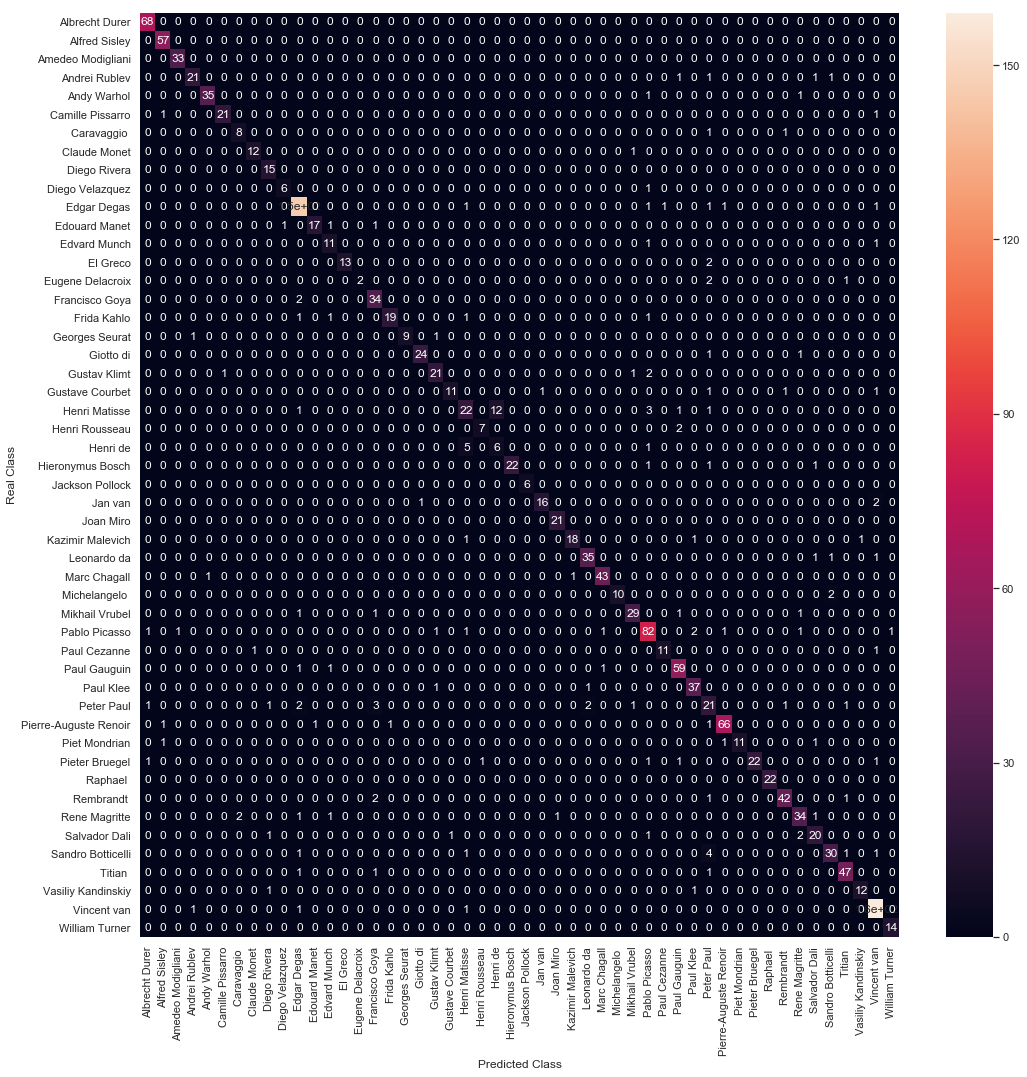

In [39]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (17,17))
sn.set(font_scale=1)#for label size
svm_conf = sn.heatmap(cm, annot=True)

In [41]:
figure = svm_conf.get_figure()    
figure.savefig('/Users/chloe/Desktop/DataScientest/project/Picasso/svm_conf.png')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                       precision    recall  f1-score   support

       Albrecht Durer       0.96      1.00      0.98        68
        Alfred Sisley       0.95      1.00      0.97        57
    Amedeo Modigliani       0.97      1.00      0.99        33
        Andrei Rublev       0.91      0.84      0.87        25
          Andy Warhol       0.97      0.95      0.96        37
     Camille Pissarro       0.95      0.91      0.93        23
          Caravaggio        0.80      0.80      0.80        10
         Claude Monet       0.92      0.92      0.92        13
         Diego Rivera       0.83      1.00      0.91        15
      Diego Velazquez       0.86      0.86      0.86         7
          Edgar Degas       0.92      0.96      0.94       152
        Edouard Manet       0.94      0.85      0.89        20
         Edvard Munch       0.73      0.85      0.79        13
             El Greco       1.00      0.87      0.93        15
     Eugene Delacroix       1.00      0.40      0.57  

In [50]:
#time calculation for the model training with the best parameters
clf_2= svm.SVC(C= 1, gamma= 0.001, kernel= 'rbf')
start = time.time()
clf_2.fit(X_train, y_train)
end = time.time()
print(end - start)
print(clf_2.score(X_test,y_test))

3.7899508476257324
0.9018551765409935


In [51]:
#time calculation for the model training with the default parameters
default SVM classifier
clf_3= svm.SVC()
start = time.time()
clf_3.fit(X_train, y_train)
end = time.time()
print(end - start)
print(clf_3.score(X_test,y_test))

17.439090967178345
0.765409934171155
